# Practical case - XOR logic

In [1]:
%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

import numpy as np

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


### Import Theano 

In [2]:
env MKL_THREADING_LAYER=GNU

env: MKL_THREADING_LAYER=GNU


In [3]:
import theano
import theano.tensor as T

### Problem: Implement a XOR logic with a neuralnet

The problem is implement the `XOR` logic function with three inputs with a neuralnet. This model have to reproduce this table:

| Input 1	| Input 2	| Input 3	| Output |
|-----------|-----------|-----------|--------|
| 0 | 0 | 0 | 0 |
| 0	| 0	| 1	| 1 |
| 0	| 1	| 0	| 1 |
| 0	| 1	| 1	| 0 |
| 1	| 0	| 0	| 1 |
| 1	| 0	| 1	| 0 |
| 1	| 1	| 0	| 0 |
| 1	| 1	| 1	| 1 |

Let's implement this model:

In [4]:
# Let's define functions for init the weights the random way:
def floatX(X):
    return np.asarray(X, dtype = theano.config.floatX)

def init_weights(shape):
    return theano.shared(floatX(np.random.randn(*shape) * 1.5))

In [5]:
# Definition of the symbolic variables
X = T.matrix()
Y = T.vector()
learning_rate = 0.01

# Bias
b1 = theano.shared(1.)
b2 = theano.shared(1.)

# Random weights
w1 = init_weights((3, 3)) # 3 neurons with 3 input each one
w2 = init_weights((3, 1)) # 1 neuron with 3 inputs

# Let's define the neurons and its relationships
a1 = T.nnet.sigmoid(T.dot(X, w1) - b1)  # Three first neurons
a2 = T.nnet.sigmoid(T.dot(a1, w2) - b2) # Last one neuron
a3 = T.flatten(a2)                      # Flatten the result for having the same format that input

# Let's define the effort function and its gradient
cost = T.nnet.binary_crossentropy(a3, Y).sum()
dw1, dw2, db1, db2 = T.grad(cost, [w1, w2, b1, b2])

# Let's define the updates
updates = [[w1, w1 - dw1 * learning_rate],
           [w2, w2 - dw2 * learning_rate],
           [b1, b1 - db1 * learning_rate],
           [b2, b2 - db2 * learning_rate]]

# Let's define the training function
train = theano.function(inputs = [X, Y],
                        outputs = [a3, cost],
                        updates = updates)

Let's training the model:

The neurnal network results are:
The result for [0, 0, 0] is 0.0032
The result for [0, 1, 0] is 0.9950
The result for [1, 0, 0] is 0.9942
The result for [1, 1, 0] is 0.0047
The result for [0, 0, 1] is 0.9942
The result for [0, 1, 1] is 0.0047
The result for [1, 0, 1] is 0.0077
The result for [1, 1, 1] is 0.9984

The vector w1.1 is [-5.94, 3.99, 9.30]
The vector w1.2 is [8.19, -4.91, -7.91]
The vector w1.3 is [-5.94, 3.99, 9.30]
The vector w2 is [12.23, -13.74, 13.08]
The bias b1 is [5.93]
The bias b2 is [5.77]


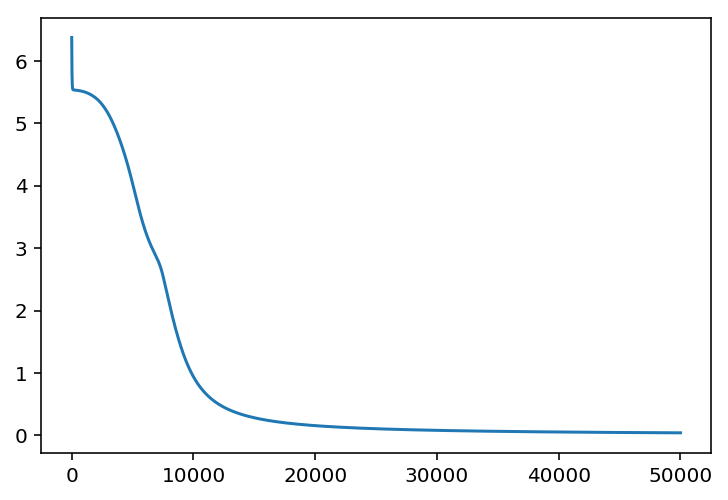

In [6]:
# Training dataset
inputs = [[0, 0, 0], [0, 1, 0], [1, 0, 0], [1, 1, 0], [0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]]
outputs = [0, 1, 1, 0, 1, 0, 0, 1]

# Let's iterate 50.000 times above train dataset
cost = []
for iteration in range(50000) :
    pred, cost_iter = train(inputs, outputs)
    # Append the cost. Don't append the pred value because we only want the last value
    cost.append(cost_iter)
    
# Print the results
print('The neurnal network results are:')
for i in range(len(inputs)) :
    print('The result for [%d, %d, %d] is %.4f' % (inputs[i][0], inputs[i][1], inputs[i][2], pred[i]))
    

# Resultados
print()
print('The vector w1.1 is [%.2f, %.2f, %.2f]' % (w1.get_value()[0][0], w1.get_value()[0][1], w1.get_value()[0][2]))
print('The vector w1.2 is [%.2f, %.2f, %.2f]' % (w1.get_value()[1][0], w1.get_value()[1][1], w1.get_value()[1][2]))
print('The vector w1.3 is [%.2f, %.2f, %.2f]' % (w1.get_value()[2][0], w1.get_value()[2][1], w1.get_value()[2][2]))
print('The vector w2 is [%.2f, %.2f, %.2f]' % (w2.get_value()[0], w2.get_value()[1], w2.get_value()[2]))
print('The bias b1 is [%.2f]' % (b1.get_value()))
print('The bias b2 is [%.2f]' % (b2.get_value()))

    
# Plot the effort function according to number of iterations
plt.plot(cost)
